In [62]:
using DrWatson

@quickactivate "Hadjivasiliou_Julia_Tutorial"

projectname()

"Hadjivasiliou_Julia_Tutorial"

In [63]:
using DifferentialEquations
using ModelingToolkit, MethodOfLines
using Plots

Next ODE: morphogen gradient - diffusion and linear degradation term

$\frac{\partial c}{\partial t} = D \frac{\partial ^ 2 c}{\partial x ^2}  - kc$

with source term $D\frac{\partial c}{\partial x}|_{x=0} = -j_0$ and zero flux at the end of the tissue, $D\frac{\partial c}{\partial x}|_{x=L} = 0$

The analytic solution $c(x) = c_0\exp(-x/\lambda) + c_1\exp(x/\lambda)$ , where $\lambda = \sqrt{\frac{D}{k}}$

In [64]:
@parameters x
@variables t c(..)

Dx = Differential(x)
Dxx = Differential(x)^2
Dt = Differential(t)

# PDE
L = 1.
D = 0.16
k = 1.
j0 = 0.4

eq  = Dt(c(t,x)) ~ D*Dxx(c(t,x)) - k*c(t,x)

# Initial and boundary conditions
bcs = [c(0,x) ~ 0., 
       Dx(c(t,0)) ~ -j0, Dx(c(t,L)) ~ 0.]

# Space and time domains
domains = [t ∈ (0.0,12.),
           x ∈ (0.0,L)]

@named pde_system = PDESystem(eq,bcs,domains,[t,x],[c(t,x)])

PDESystem
Equations: Equation[Differential(t)(c(t, x)) ~ 0.16Differential(x)(Differential(x)(c(t, x))) - c(t, x)]
Boundary Conditions: Equation[c(0, x) ~ 0.0, Differential(x)(c(t, 0)) ~ -0.4, Differential(x)(c(t, 1.0)) ~ 0.0]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(t, 0.0..12.0), Symbolics.VarDomainPairing(x, 0.0..1.0)]
Dependent Variables: Num[c(t, x)]
Independent Variables: Num[t, x]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [65]:
Nc = 100

dx = L/(Nc-1)

order = 2
discretization = MOLFiniteDifference([x => dx], t);

In [66]:
prob = discretize(pde_system,discretization);

In [67]:
sol = solve(prob, Tsit5(),abstol = 1e-8,reltol = 1e-6,maxiters = 1e6);

https://bmcsystbiol.biomedcentral.com/articles/10.1186/1752-0509-3-90

The smallest chemical reaction system with bistability

In [68]:
using Catalyst, Latexify

In [69]:
wilhelm = @reaction_network begin
    k1, Y --> 2X
    k2, 2X --> X + Y
    k3, X + Y --> Y
    k4, X --> 0
end k1 k2 k3 k4

reactions(wilhelm)


4-element Vector{Reaction}:
 k1, Y --> 2*X
 k2, 2*X --> X + Y
 k3, X + Y --> Y
 k4, X --> ∅

In [70]:
species(wilhelm)

2-element Vector{Term{Real, Base.ImmutableDict{DataType, Any}}}:
 Y(t)
 X(t)

In [71]:
parameters(wilhelm)

4-element Vector{Sym{Real, Base.ImmutableDict{DataType, Any}}}:
 k1
 k2
 k3
 k4

In [72]:
odesys = convert(ODESystem, wilhelm)

Model ##ReactionSystem#320 with 2 equations
States (2):
  Y(t)
  X(t)
Parameters (4):
  k1
  k2
  k3
  k4

In [73]:
p = [:k1 => 8.0, :k2 => 1.0, :k3 => 1.0, :k4 => 1.5]
u0 = [2.5 0.5]

prob = ODEProblem(wilhelm,u0,(0,10),p)

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 10)
u0: 2-element Vector{Float64}:
 2.5
 0.5

In [74]:
sol = solve(prob,AutoTsit5(Rosenbrock23()));

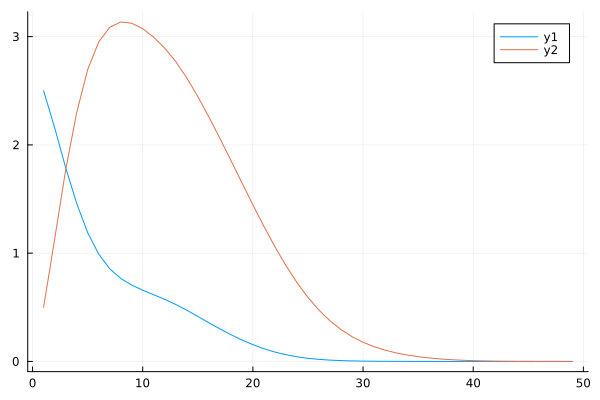

In [75]:
plot(map(x->x[1],sol.u))
plot!(map(x->x[2],sol.u))
